![FIFA 19 Data Visualization](https://media.gamestop.com/i/gamestop/10164242/FIFA-19-Champions-Edition?$zoom$)

<a class="anchor" id="0"></a>
# **FIFA 19 Player Data Visualization**


In this notebook, I will demonstrate data visualizaton techniques using the **FIFA 19 complete player dataset**. 

So, let's get started.

# **Table of Contents** 

1.	Introduction to FIFA 19 complete player dataset
2.	Import libraries
3.	Read dataset
4.  Data Exploration
5.  Segregation of Indian Players
6.  Data Visualization
7.  Analyse players based on Nationality
8.  Analyse players based on Club
9.  Profiling top players
10. Data Analysis



# **1. Introduction to FIFA 19 complete player dataset** 


- The dataset includes lastest edition FIFA 2019 players attributes which are as follows - 

  - Age, Nationality, Overall, Potential, Club, Value, Wage, Preferred Foot, International Reputation, Weak Foot, Skill Moves, Work Rate, Position, Jersey Number, Joined, Loaned From, Contract Valid Until, Height, Weight, LS, ST, RS, LW, LF, CF, RF, RW, LAM, CAM, RAM, LM, LCM, CM, RCM, RM, LWB, LDM, CDM, RDM, RWB, LB, LCB, CB, RCB, RB, Crossing, Finishing, Heading, Accuracy, ShortPassing, Volleys, Dribbling, Curve, FKAccuracy, LongPassing, BallControl, Acceleration, SprintSpeed, Agility, Reactions, Balance, ShotPower, Jumping, Stamina, Strength, LongShots, Aggression, Interceptions, Positioning, Vision, Penalties, Composure, Marking, StandingTackle, SlidingTackle, GKDiving, GKHandling, GKKicking, GKPositioning, GKReflexes, and Release Clause.



# **2. Import libraries** 

In [2]:
# ignore warnings :
import warnings
warnings.filterwarnings('ignore')


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# for visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
plt.style.use('fivethirtyeight')

# to visualize missing data
#import missingno as msno


In [3]:
# adjust figure size
plt.rcParams['figure.figsize'] = (12,8)

# **3. Read dataset** 

In [7]:
# check execution time
%time


# import data
df = pd.read_csv('/home/navin/Desktop/Workshop-Data Science/Data-Analysis-and-Visualization-with-Python-master/fifa19.csv', encoding='latin-1')

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs


# **4. Data Exploration** 

- Now, let's begin data exploration to gain insights about our data.

In [8]:
# shape of the data
df.shape

(18207, 89)

- We can see that there are 18207 rows and 89 columns in the dataset.

In [9]:
# preview dataset
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31.0,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94.0,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5M
1,1,20801,Cristiano Ronaldo,33.0,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94.0,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1M
2,2,190871,Neymar Jr,26.0,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92.0,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1M
3,3,193080,De Gea,27.0,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91.0,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6M
4,4,192985,K. De Bruyne,27.0,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91.0,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4M


In [10]:
# view column names
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [11]:
# drop redundant columns
df.drop('Unnamed: 0', axis=1, inplace=True)

In [12]:
# view dataframe summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 88 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18206 non-null float64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18206 non-null float64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-n

In [13]:
# check for missing values
df.isnull().sum()

ID                   0
Name                 0
Age                  1
Photo                0
Nationality          0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 88, dtype: int64

- We can see that the dataset contain missing values.

In [14]:
# fill missing values for continuous variables for proper data visualization
df['ShortPassing'].fillna(df['ShortPassing'].mean(), inplace = True)
df['Volleys'].fillna(df['Volleys'].mean(), inplace = True)
df['Dribbling'].fillna(df['Dribbling'].mean(), inplace = True)
df['Curve'].fillna(df['Curve'].mean(), inplace = True)
df['FKAccuracy'].fillna(df['FKAccuracy'], inplace = True)
df['LongPassing'].fillna(df['LongPassing'].mean(), inplace = True)
df['BallControl'].fillna(df['BallControl'].mean(), inplace = True)
df['HeadingAccuracy'].fillna(df['HeadingAccuracy'].mean(), inplace = True)
df['Finishing'].fillna(df['Finishing'].mean(), inplace = True)
df['Crossing'].fillna(df['Crossing'].mean(), inplace = True)
df['Weight'].fillna('200lbs', inplace = True)
df['Contract Valid Until'].fillna(2019, inplace = True)
df['Height'].fillna("5'11", inplace = True)
df['Loaned From'].fillna('None', inplace = True)
df['Joined'].fillna('Jul 1, 2018', inplace = True)
df['Jersey Number'].fillna(8, inplace = True)
df['Body Type'].fillna('Normal', inplace = True)
df['Position'].fillna('ST', inplace = True)
df['Club'].fillna('No Club', inplace = True)
df['Work Rate'].fillna('Medium/ Medium', inplace = True)
df['Skill Moves'].fillna(df['Skill Moves'].median(), inplace = True)
df['Weak Foot'].fillna(3, inplace = True)
df['Preferred Foot'].fillna('Right', inplace = True)
df['International Reputation'].fillna(1, inplace = True)
df['Wage'].fillna('€200K', inplace = True)



In [15]:
df.fillna(0, inplace = True)

# **5. Segregation of Indian Players** 

In [16]:
def country(x):
    return df[df['Nationality'] == x].head()


# prepare dataset for Indian players
country('India')

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
8605,190939,S. Chhetri,33.0,https://cdn.sofifa.org/players/4/19/190939.png,India,https://cdn.sofifa.org/flags/159.png,67.0,67,No Club,https://cdn.sofifa.org/flags/159.png,...,67.0,30.0,24.0,44.0,10.0,7.0,11.0,9.0,10.0,0
10011,223763,S. Jhingan,24.0,https://cdn.sofifa.org/players/4/19/223763.png,India,https://cdn.sofifa.org/flags/159.png,65.0,71,No Club,https://cdn.sofifa.org/flags/159.png,...,64.0,64.0,61.0,60.0,13.0,11.0,7.0,11.0,12.0,0
12598,217225,J. Lalpekhlua,27.0,https://cdn.sofifa.org/players/4/19/217225.png,India,https://cdn.sofifa.org/flags/159.png,63.0,64,No Club,https://cdn.sofifa.org/flags/159.png,...,47.0,28.0,31.0,29.0,13.0,11.0,10.0,10.0,11.0,0
12811,225213,G. Singh Sandhu,26.0,https://cdn.sofifa.org/players/4/19/225213.png,India,https://cdn.sofifa.org/flags/159.png,63.0,68,No Club,https://cdn.sofifa.org/flags/159.png,...,57.0,19.0,15.0,11.0,63.0,59.0,59.0,62.0,64.0,0
13508,238205,A. Edathodika,31.0,https://cdn.sofifa.org/players/4/19/238205.png,India,https://cdn.sofifa.org/flags/159.png,62.0,62,No Club,https://cdn.sofifa.org/flags/159.png,...,49.0,67.0,62.0,68.0,14.0,15.0,14.0,11.0,7.0,0


# **6. Data Visualization** 

## **Distribution of preferred foot**


Q. What is the distribution of preferred foot ?

A. The distribution of preferred foot can be obtained as follows -

In [17]:
df['Preferred Foot'].value_counts()

Right    13996
Left      4211
Name: Preferred Foot, dtype: int64

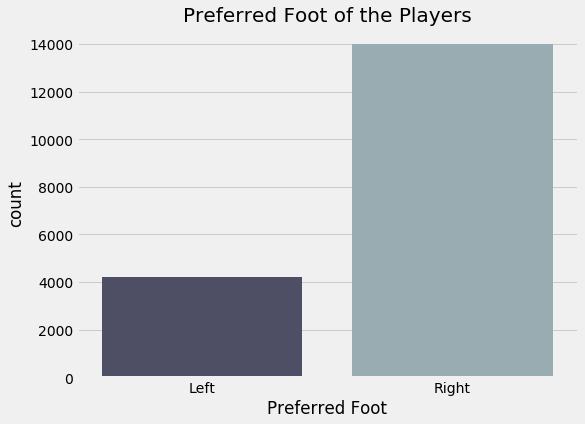

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(df['Preferred Foot'], palette = 'bone')
plt.title('Preferred Foot of the Players', fontsize = 20)
plt.show()

- The above countplot is great but it does not show up the exact number of players on top of the bar. To show the exact numbers we can proceed as follows-

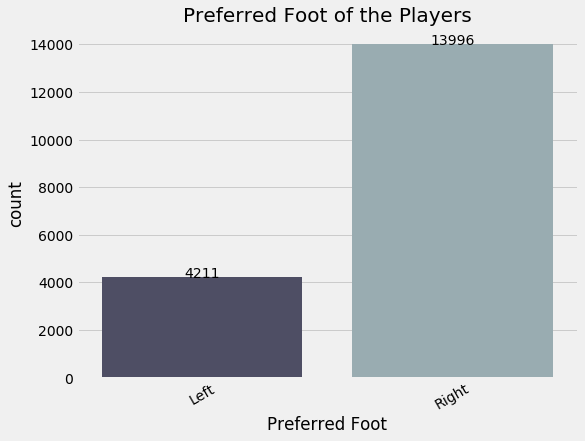

In [19]:
fig, ax = plt.subplots(figsize=(8,6))
graph = sns.countplot(ax=ax,x=df['Preferred Foot'], data=df, palette = 'bone')
graph.set_title('Preferred Foot of the Players', fontsize = 20)
graph.set_xticklabels(graph.get_xticklabels(),rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

- Now the above countplots are great but they do not show up the exact percentages of players. We can show the exact percentages of players as follows-

In [20]:
df['Preferred Foot'].value_counts()/len(df)

Right    0.768715
Left     0.231285
Name: Preferred Foot, dtype: float64

- We can use a pie chart to visualize the exact percentages.

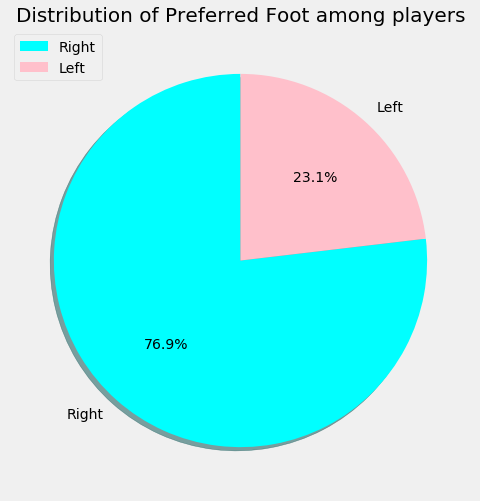

In [21]:
labels = df['Preferred Foot'].value_counts().index
size = df['Preferred Foot'].value_counts()
colors=['cyan','pink']
plt.pie(size, labels = labels, colors = colors, shadow = True, autopct='%1.1f%%',startangle = 90)
plt.title('Distribution of Preferred Foot among players', fontsize = 20)
plt.legend()
plt.show()

## **Distribution of weak foot**


Q. What is the distribution of weak foot ?

A. The distribution of weak foot can be obtained as follows -

In [22]:
df['Weak Foot'].value_counts()

3.0    11397
2.0     3761
4.0     2662
5.0      229
1.0      158
Name: Weak Foot, dtype: int64

- We can visualize distribution of Weak foot as follows -

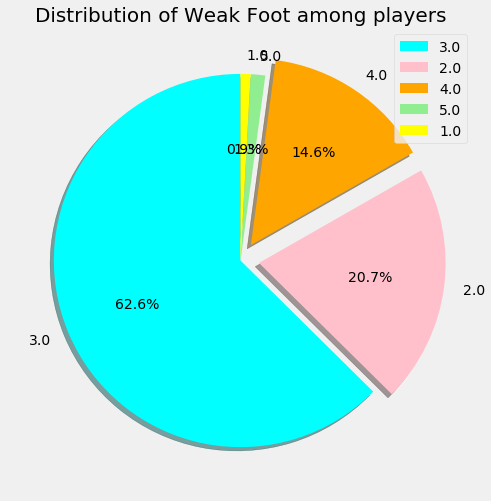

In [23]:
labels = df['Weak Foot'].value_counts().index
size = df['Weak Foot'].value_counts()
colors=['cyan','pink','orange','lightgreen','yellow']
explode = [0, 0.1, 0.1, 0, 0]
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct='%1.1f%%',startangle = 90)
plt.title('Distribution of Weak Foot among players', fontsize = 20)
plt.legend()
plt.show()

## **Age distribution of players**

Q. How can we visualize the age distribution of players.

A. We can use a histogram to visualize the age distribution of players.

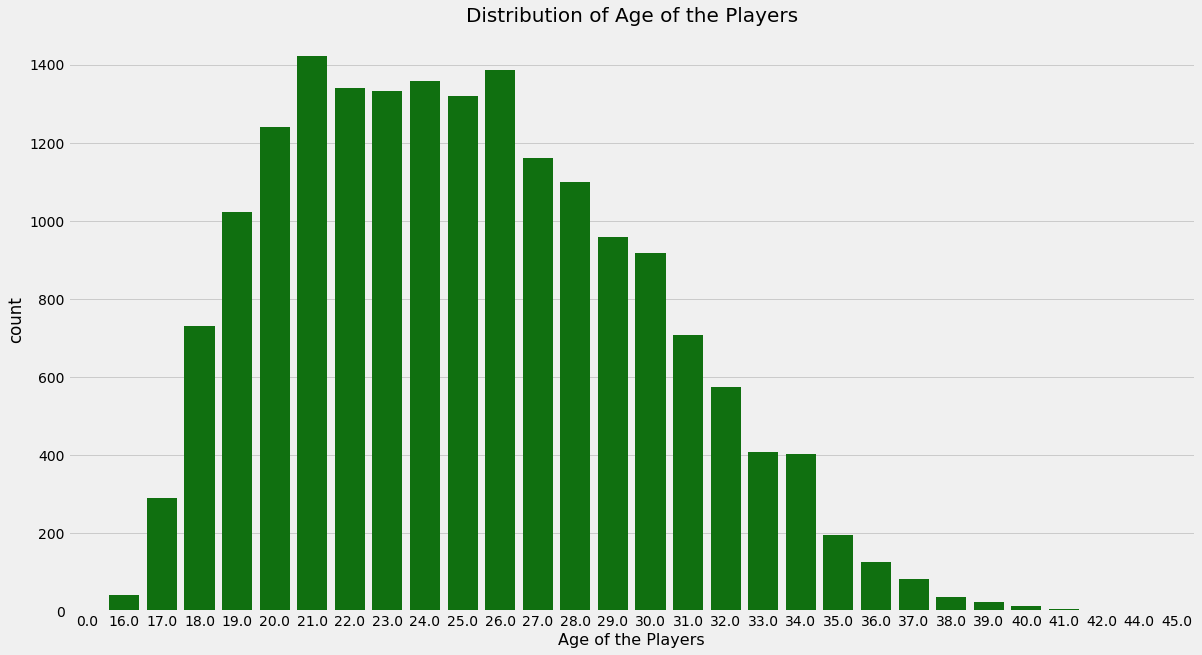

In [24]:
x = df['Age']
plt.figure(figsize=(18,10))
ax = sns.countplot(x, color='g')
ax.set_xlabel(xlabel = 'Age of the Players', fontsize = 16)
ax.set_title(label = 'Distribution of Age of the Players', fontsize = 20)
plt.show()

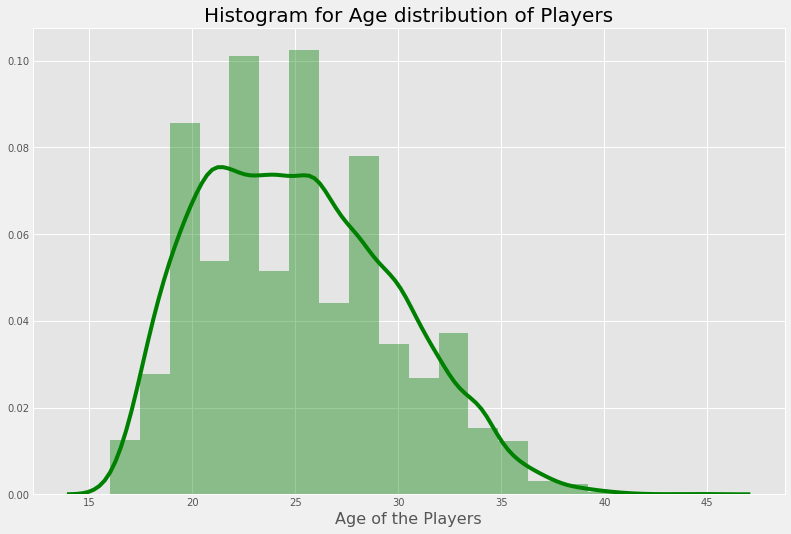

In [22]:
x = df['Age']
plt.figure(figsize = (12, 8))
plt.style.use('ggplot')
ax = sns.distplot(x, bins = 20, kde = True, color='g')
ax.set_xlabel(xlabel = 'Age of the Players', fontsize = 16)
ax.set_title(label = 'Histogram for Age distribution of Players', fontsize = 20)
plt.show()



- Please see [Seaborn Color Palettes](https://seaborn.pydata.org/tutorial/color_palettes.html) for more information on Seaborn Color Palettes.

## **Visualize International Reputation**


Q. How can we track international reputation of players.

A. We can track international reputation of players as follows -

In [25]:
df['International Reputation'].value_counts()

1.0    16580
2.0     1261
3.0      309
4.0       51
5.0        6
Name: International Reputation, dtype: int64

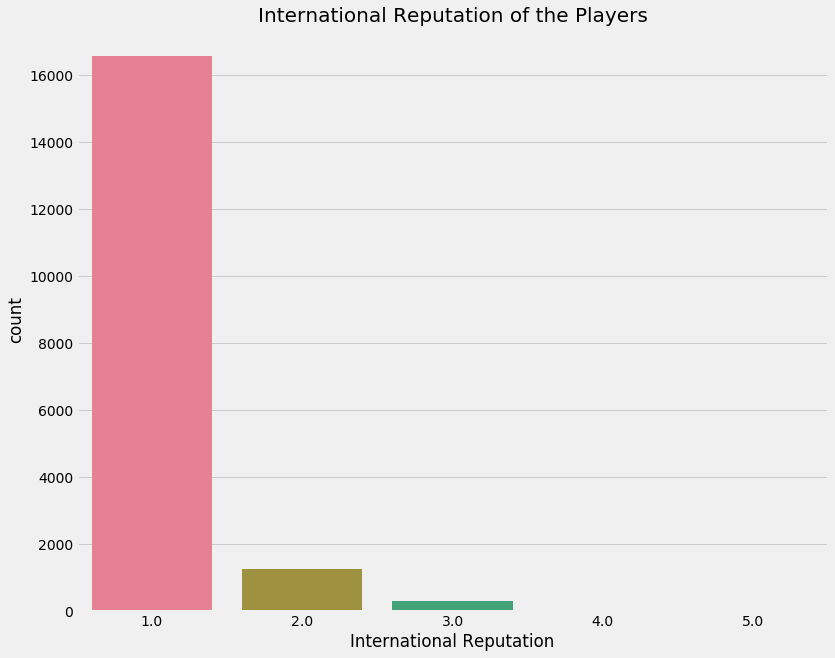

In [26]:
plt.figure(figsize=(12,10))
sns.countplot(df['International Reputation'], palette = 'husl')
plt.title('International Reputation of the Players', fontsize = 20)
plt.show()

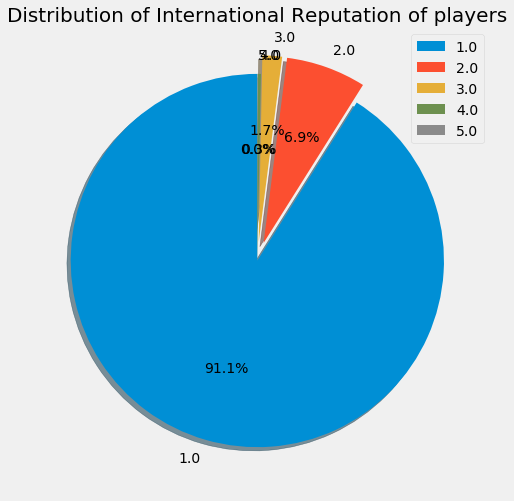

In [27]:
labels = df['International Reputation'].value_counts().index
size = df['International Reputation'].value_counts()
explode = [0, 0.1, 0.1, 0, 0]
plt.pie(size, labels = labels, explode = explode, shadow = True, autopct='%1.1f%%',startangle = 90)
plt.title('Distribution of International Reputation of players', fontsize = 20)
plt.legend()
plt.show()

Q. What is the international reputation of left and right footed players?

A. The international reputation of left and right footed players can be given as follows -

In [28]:
df.groupby('Preferred Foot')['International Reputation'].value_counts()

Preferred Foot  International Reputation
Left            1.0                          3839
                2.0                           290
                3.0                            66
                4.0                            15
                5.0                             1
Right           1.0                         12741
                2.0                           971
                3.0                           243
                4.0                            36
                5.0                             5
Name: International Reputation, dtype: int64

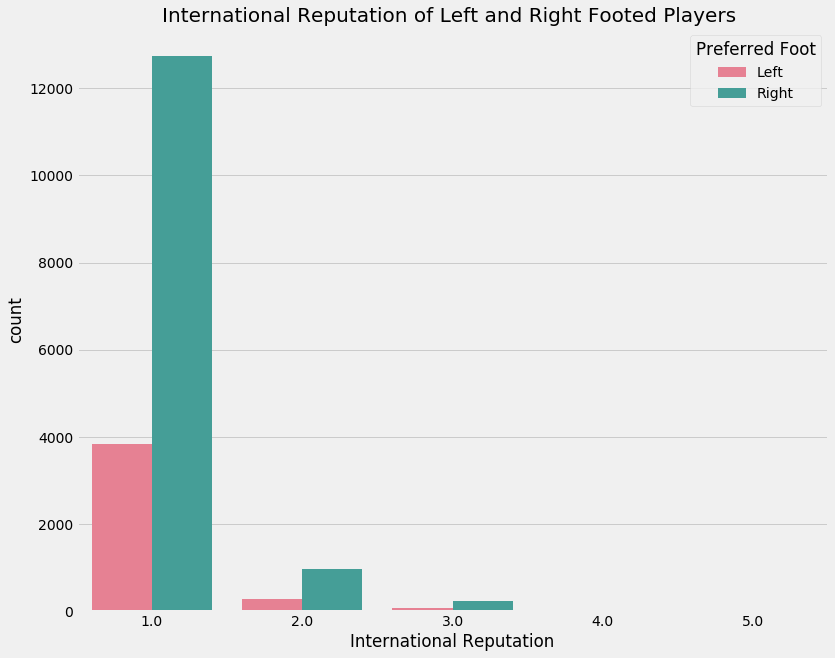

In [29]:
plt.figure(figsize=(12,10))
sns.countplot(df['International Reputation'], hue=df['Preferred Foot'], palette = 'husl')
plt.title('International Reputation of Left and Right Footed Players ', fontsize = 20)
plt.show()

## **Work Rate of the Players**


Q. What is the different work rate of the players?

A. The different work rate of the players can be given as follows -

In [30]:
df['Work Rate'].value_counts()

Medium/ Medium    9858
High/ Medium      3173
Medium/ High      1690
High/ High        1015
Medium/ Low        850
High/ Low          699
Low/ Medium        449
Low/ High          439
Low/ Low            34
Name: Work Rate, dtype: int64

- We can visualize the work rate of the players as follows -

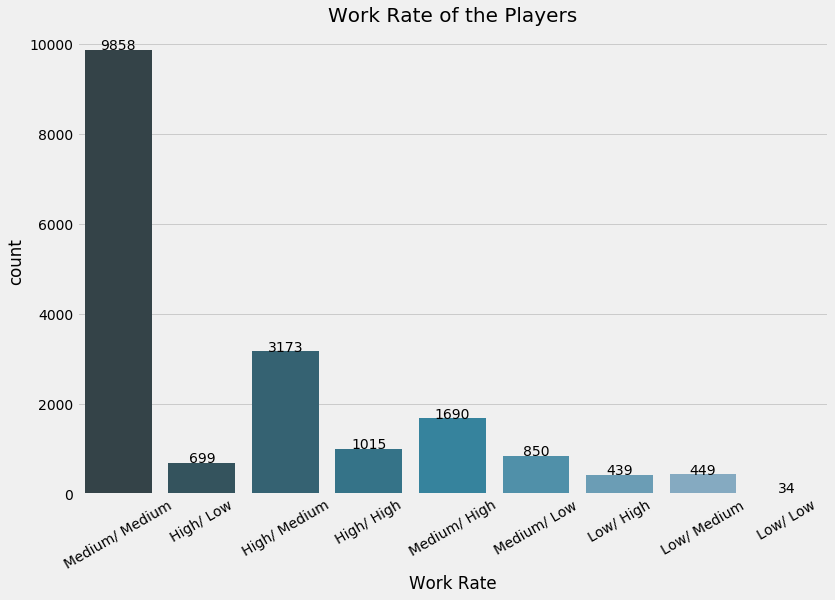

In [31]:
fig, ax = plt.subplots(figsize=(12,8))
graph = sns.countplot(ax=ax,x=df['Work Rate'], data=df, palette = 'PuBuGn_d')
graph.set_title('Work Rate of the Players', fontsize = 20)
graph.set_xticklabels(graph.get_xticklabels(), rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

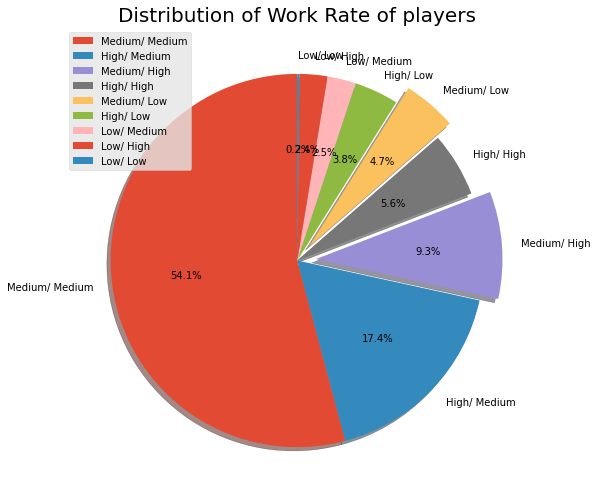

In [30]:
labels = df['Work Rate'].value_counts().index
size = df['Work Rate'].value_counts()
explode = [0,0,0.1,0,0.1,0,0,0,0]
plt.pie(size, labels = labels, explode = explode, shadow = True, autopct='%1.1f%%',startangle = 90)
plt.title('Distribution of Work Rate of players', fontsize = 20)
plt.legend()
plt.show()

Q. How can we visualze work rate of players segregated by preferred foot?

A. We can visualize work rate of players segregated by preferred foot as follows-

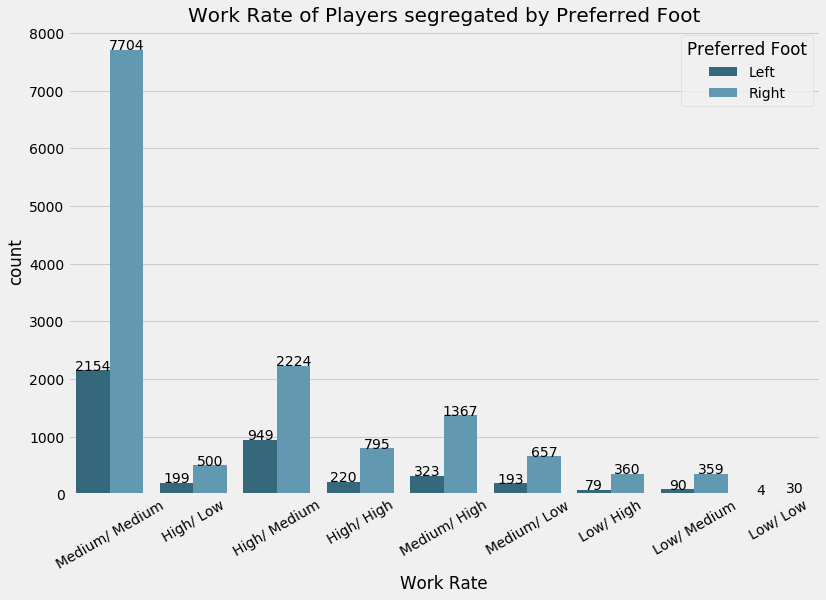

In [32]:
fig, ax = plt.subplots(figsize=(12,8))
graph = sns.countplot(ax=ax,x=df['Work Rate'], data=df, hue='Preferred Foot', palette = 'PuBuGn_d')
graph.set_title('Work Rate of Players segregated by Preferred Foot'  , fontsize = 20)
graph.set_xticklabels(graph.get_xticklabels(), rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

## **Skill Moves of the Players**


Q. What is the different skill moves of the players?

A. The different work rate of the players can be given as follows -

In [33]:
df['Skill Moves'].value_counts()

2.0    8613
3.0    6600
1.0    2026
4.0     917
5.0      51
Name: Skill Moves, dtype: int64

- We can visualize the skill moves of the players as follows-

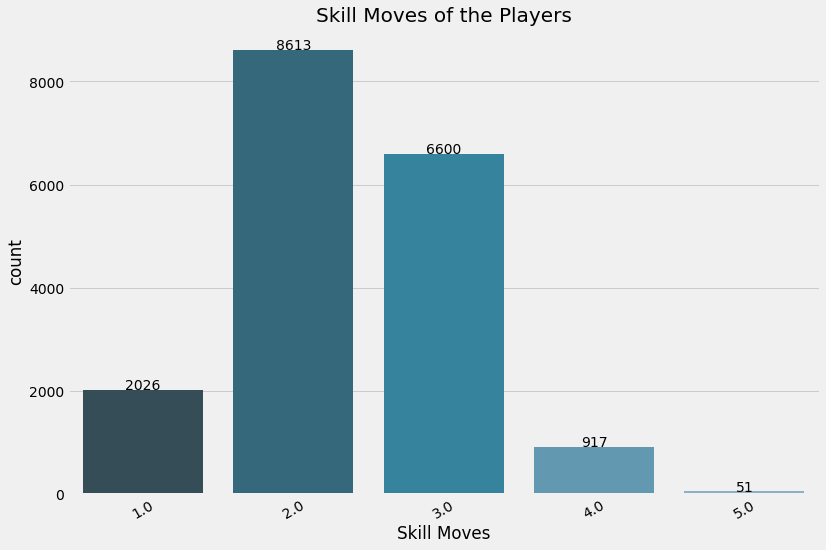

In [34]:
fig, ax = plt.subplots(figsize=(12,8))
graph = sns.countplot(ax=ax,x=df['Skill Moves'], data=df, palette = 'PuBuGn_d')
graph.set_title('Skill Moves of the Players', fontsize = 20)
graph.set_xticklabels(graph.get_xticklabels(), rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

Q. How can we visualze skill moves of players segregated by preferred foot?

A. We can visualize skill moves of players segregated by preferred foot as follows-

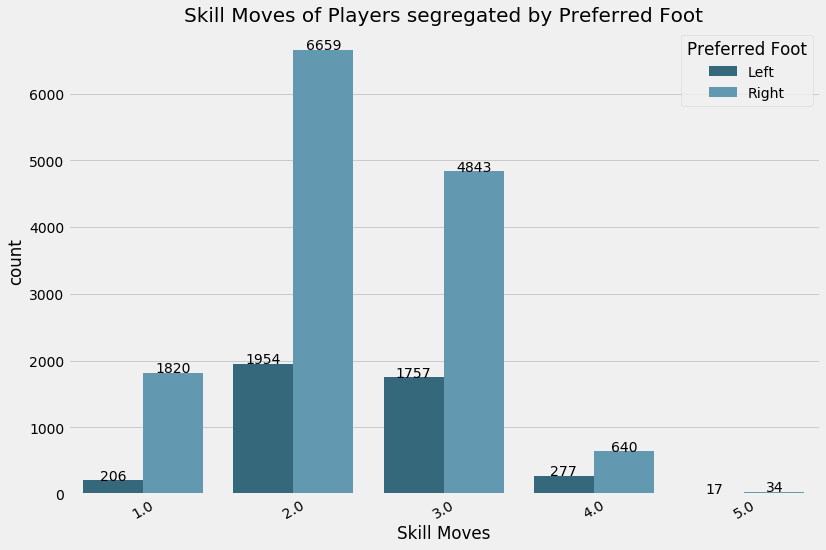

In [35]:
fig, ax = plt.subplots(figsize=(12,8))
graph = sns.countplot(ax=ax,x=df['Skill Moves'], data=df, hue='Preferred Foot', palette = 'PuBuGn_d')
graph.set_title('Skill Moves of Players segregated by Preferred Foot'  , fontsize = 20)
graph.set_xticklabels(graph.get_xticklabels(), rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

## **Special Score of the Players**


Q. How can we visualize special score of the players?

A. The special score of the players can be visualized with histogram as follows -

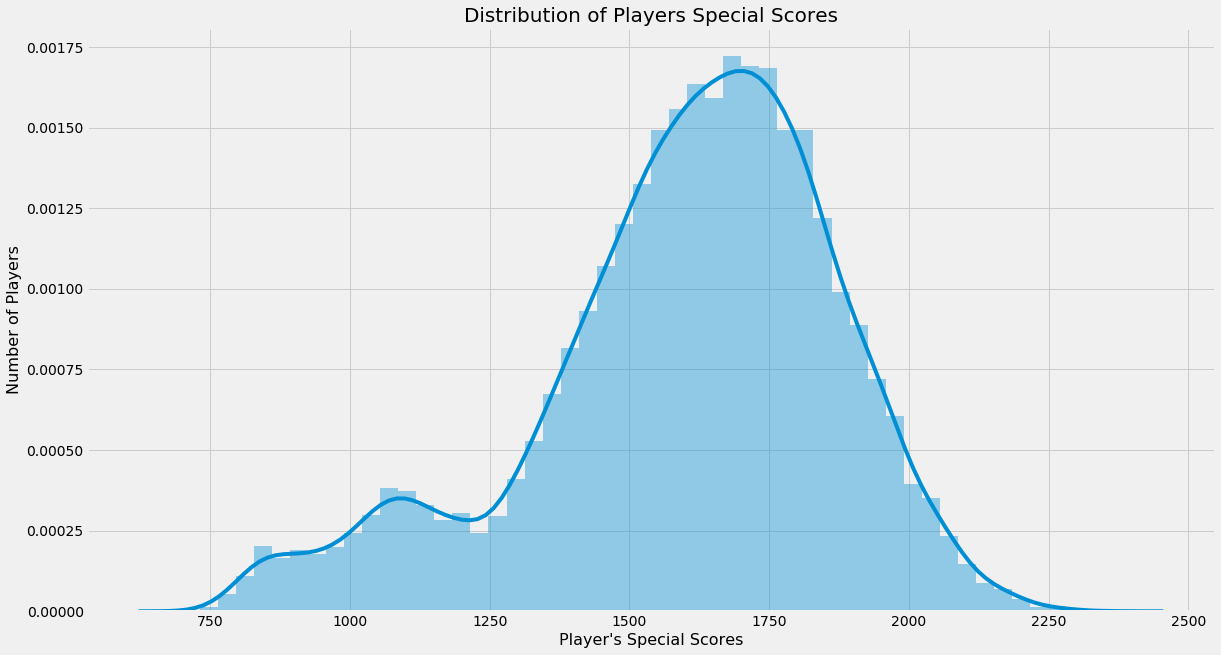

In [36]:
x = df['Special']
plt.figure(figsize=(18,10))
ax = sns.distplot(x)
ax.set_xlabel(xlabel = "Player's Special Scores", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of Players', fontsize = 16)
ax.set_title(label = 'Distribution of Players Special Scores', fontsize = 20)
plt.show()

## **Potential Score of the Players**


Q. How can we visualize potential score of the players?

A. The potential score of the players can be visualized with histogram as follows -

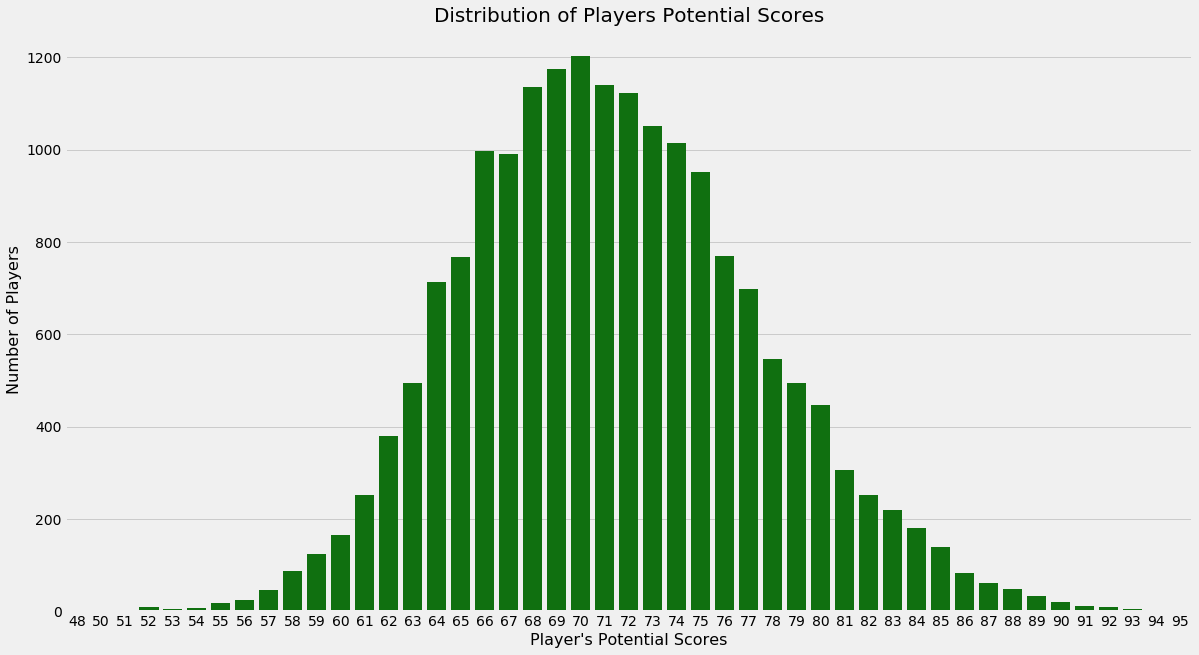

In [37]:
x = df['Potential']
plt.figure(figsize=(18,10))
ax = sns.countplot(x, color='g')
ax.set_xlabel(xlabel = "Player's Potential Scores", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of Players', fontsize = 16)
ax.set_title(label = 'Distribution of Players Potential Scores', fontsize = 20)
plt.show()

## **Overall Score of the Players**


Q. How can we visualize overall score of the players?

A. The overall score of the players can be visualized with histogram as follows -

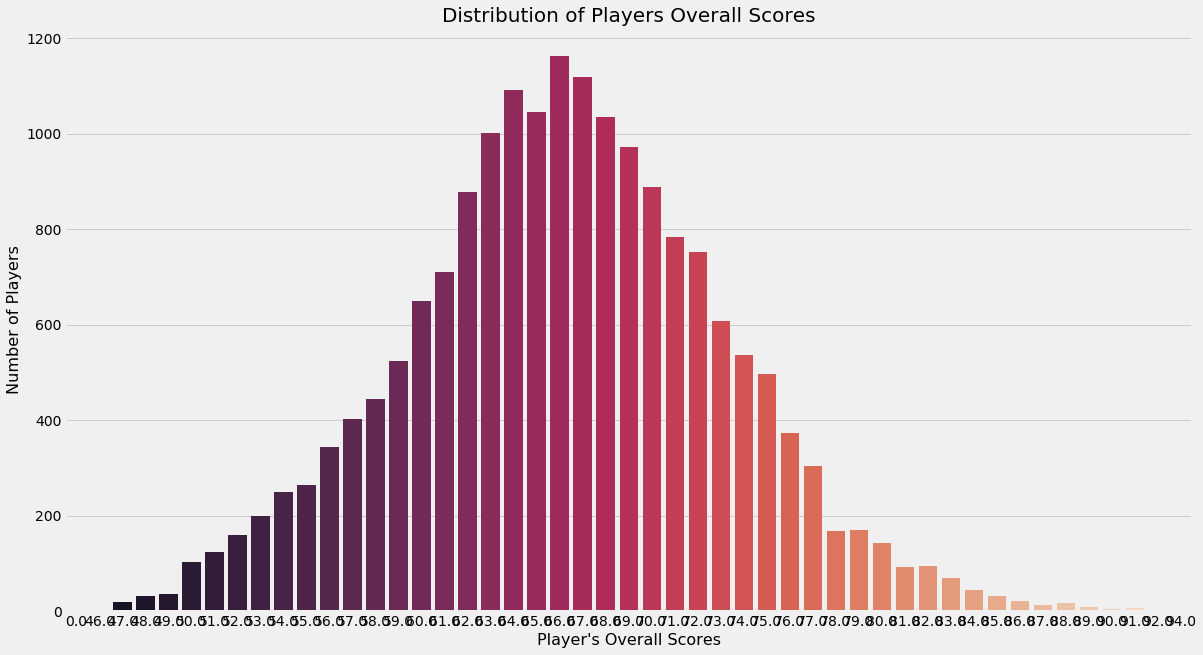

In [38]:
x = df['Overall']
plt.figure(figsize=(18,10))
ax = sns.countplot(x, palette='rocket')
ax.set_xlabel(xlabel = "Player's Overall Scores", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of Players', fontsize = 16)
ax.set_title(label = 'Distribution of Players Overall Scores', fontsize = 20)
plt.show()

## **Count of Players with Positions**


Q. What is the number of players at different positions?

A. The number of players at different positions can be found as follows - 

In [39]:
df['Position'].value_counts()

ST     2212
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
LAM      21
RAM      21
RF       16
LF       15
Name: Position, dtype: int64

- We can visualize number of players at different positions as follows -

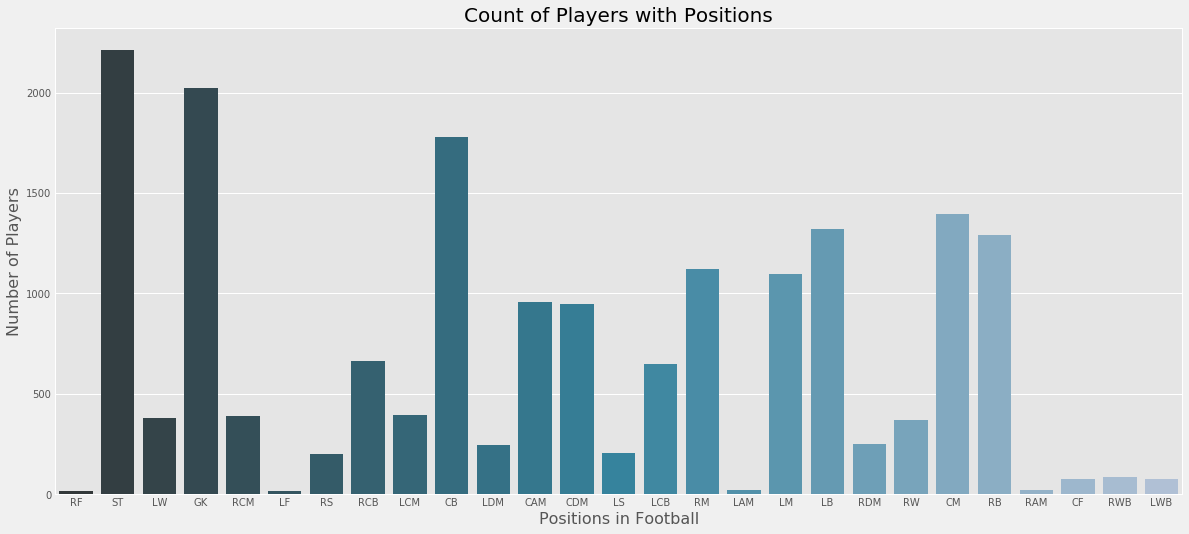

In [40]:
# different positions acquired by the players 

plt.figure(figsize = (18, 8))
plt.style.use('ggplot')
ax = sns.countplot('Position', data = df, palette = 'PuBuGn_d')
ax.set_xlabel(xlabel = 'Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Number of Players', fontsize = 16)
ax.set_title(label = 'Count of Players with Positions', fontsize = 20)   
plt.show()


# **7. Analyse players based on nationality** 


Q. How do we calculate number of countries?


A. We can calculate number of countries as follows -


In [41]:
df['Nationality'].nunique()

164

Q. Which countries are there in the dataset?

A. The names of countries are as follows -

In [42]:
df['Nationality'].unique()

array(['Argentina', 'Portugal', 'Brazil', 'Spain', 'Belgium', 'Croatia',
       'Uruguay', 'Slovenia', 'Poland', 'Germany', 'France', 'England',
       'Italy', 'Egypt', 'Colombia', 'Denmark', 'Gabon', 'Wales',
       'Senegal', 'Costa Rica', 'Slovakia', 'Netherlands',
       'Bosnia Herzegovina', 'Morocco', 'Serbia', 'Algeria', 'Austria',
       'Greece', 'Chile', 'Sweden', 'Korea Republic', 'Finland', 'Guinea',
       'Montenegro', 'Armenia', 'Switzerland', 'Norway', 'Czech Republic',
       'Scotland', 'Ghana', 'Central African Rep.', 'DR Congo',
       'Ivory Coast', 'Russia', 'Ukraine', 'Iceland', 'Mexico', 'Jamaica',
       'Albania', 'Venezuela', 'Japan', 'Turkey', 'Ecuador', 'Paraguay',
       'Mali', 'Nigeria', 'Cameroon', 'Dominican Republic', 'Israel',
       'Kenya', 'Hungary', 'Republic of Ireland', 'Romania',
       'United States', 'Cape Verde', 'Australia', 'Peru', 'Togo',
       'Syria', 'Zimbabwe', 'Angola', 'Burkina Faso', 'Iran', 'Estonia',
       'Tunisia', 'Equato

Q. Which are top 10 countries with most number of players?

A. The top 10 countries with most number of players are as follows -

In [43]:
top_countries = df['Nationality'].value_counts().head(10)

top_countries

England        1662
Germany        1198
Spain          1072
Argentina       937
France          914
Brazil          827
Italy           702
Colombia        618
Japan           478
Netherlands     453
Name: Nationality, dtype: int64

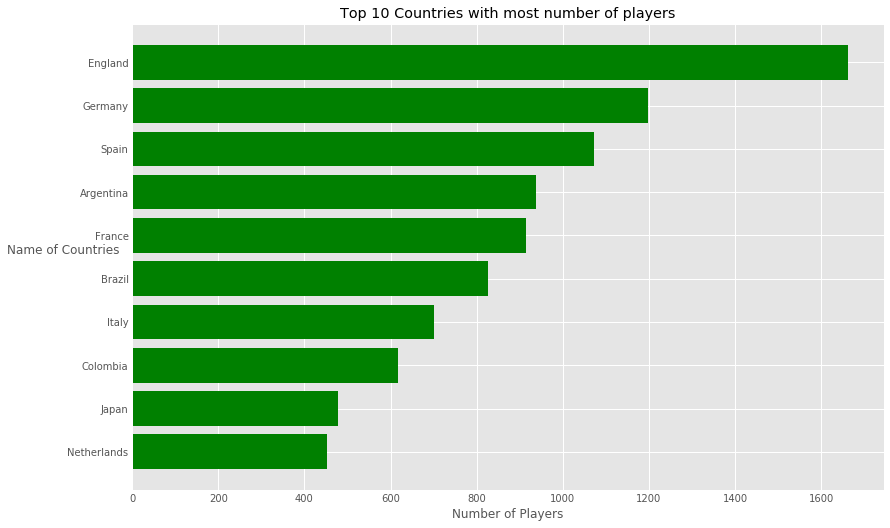

In [44]:
fig, ax = plt.subplots(figsize=(12,8))
x = top_countries.values
y = top_countries.index
ax.barh(y, x, align='center', color='green')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Players')
ax.set_ylabel('Name of Countries', rotation=0)
ax.set_title('Top 10 Countries with most number of players')
plt.show()


In [45]:
top_countries_name = top_countries.index

top_countries_name

Index(['England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy',
       'Colombia', 'Japan', 'Netherlands'],
      dtype='object')

## **Age distribution from top countries**


Q. What is the age distribution from top countries?

A. We can draw a box plot to check the age distribution from top countries.

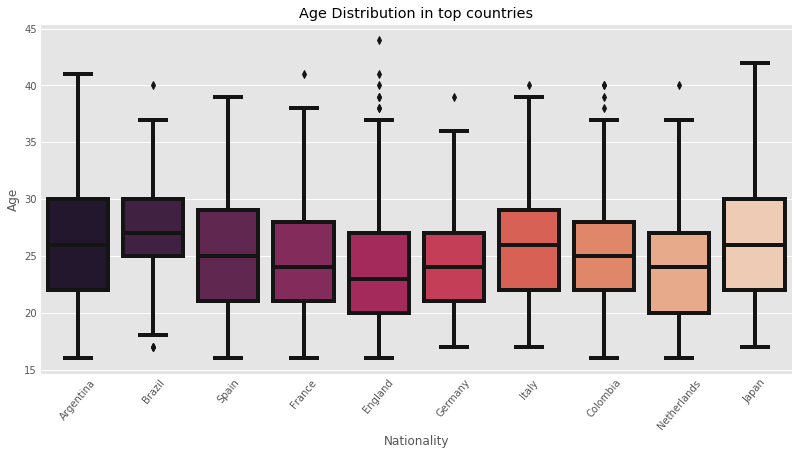

In [46]:
df_country_age = df.loc[df['Nationality'].isin(top_countries_name) & df['Age']]
plt.figure(1 , figsize = (12,6))
sns.boxplot(x = 'Nationality' , y = 'Age' , data = df_country_age, palette='rocket')
plt.title('Age Distribution in top countries')
plt.xticks(rotation = 50)
plt.show()

So, Germany, England and Netherlands have youngest set of players and Argentian and Brazil have eldest set of players.

## **Overall Rating**

Q. What is the distribution of Overall Score of Players from top countries?

A. We can draw a barplot to check the distribution of Overall Score of Players from top countries as follows -

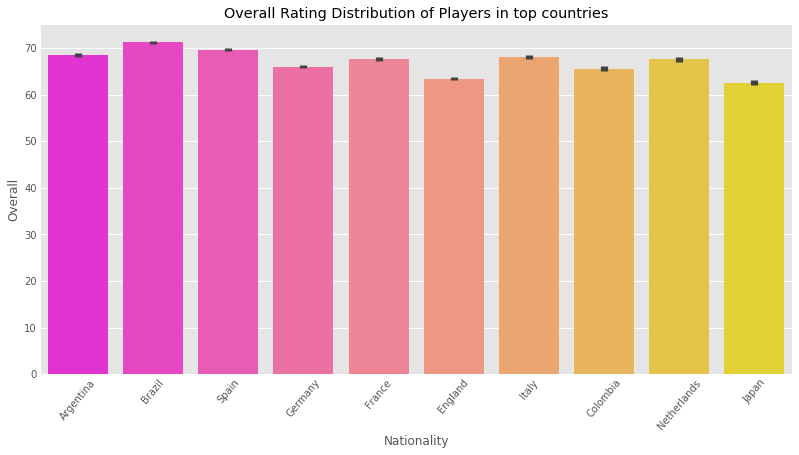

In [47]:
df_country_rating = df.loc[df['Nationality'].isin(top_countries_name) & df['Overall']]
plt.figure(1 , figsize = (12,6))
sns.barplot(x = 'Nationality' , y = 'Overall' , data = df_country_rating, palette='spring')
plt.title('Overall Rating Distribution of Players in top countries')
plt.xticks(rotation = 50)
plt.show()

## **Potential Rating**

Q. What is the distribution of Potential Score of Players from top countries?

A. We can draw a barplot to check the distribution of Potential Score of Players from top countries as follows -

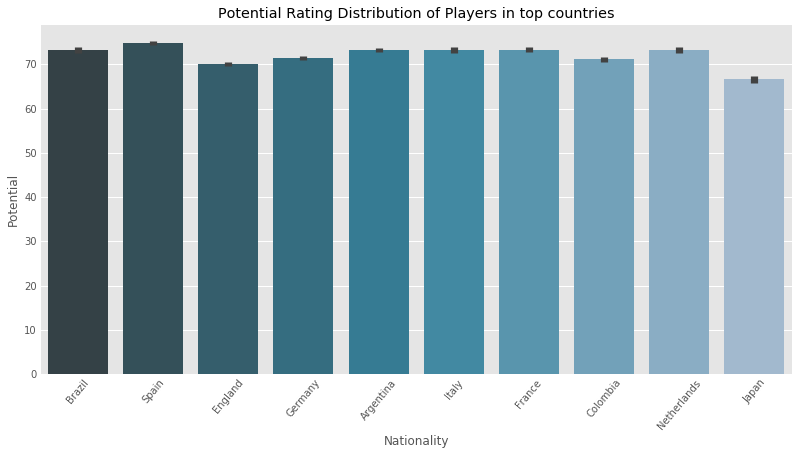

In [48]:
df_country_rating = df.loc[df['Nationality'].isin(top_countries_name) & df['Potential']]
plt.figure(1 , figsize = (12,6))
sns.barplot(x = 'Nationality' , y = 'Potential' , data = df_country_rating, palette='PuBuGn_d')
plt.title('Potential Rating Distribution of Players in top countries')
plt.xticks(rotation = 50)
plt.show()

# **8. Analyse players based on club** 

Q. How many clubs are there?

In [49]:
df['Club'].nunique()

652

Q. What are the club names?

In [50]:
df['Club'].unique()

array(['FC Barcelona', 'Juventus', 'Paris Saint-Germain',
       'Manchester United', 'Manchester City', 'Chelsea', 'Real Madrid',
       'Atlético Madrid', 'FC Bayern München', 'Tottenham Hotspur',
       'Liverpool', 'Napoli', 'Arsenal', 'Milan', 'Inter', 'Lazio',
       'Borussia Dortmund', 'Vissel Kobe', 'Olympique Lyonnais', 'Roma',
       'Valencia CF', 'Guangzhou Evergrande Taobao FC', 'FC Porto',
       'FC Schalke 04', 'Be?ikta? JK', 'LA Galaxy', 'Sporting CP',
       'Real Betis', 'Olympique de Marseille', 'RC Celta',
       'Bayer 04 Leverkusen', 'Real Sociedad', 'Villarreal CF',
       'Sevilla FC', 'SL Benfica', 'AS Saint-Étienne', 'AS Monaco',
       'Leicester City', 'Atalanta', 'Grêmio', 'Atlético Mineiro',
       'RB Leipzig', 'Ajax', 'Dalian YiFang FC', 'Everton',
       'West Ham United', '1. FC Köln', 'TSG 1899 Hoffenheim',
       'Shanghai SIPG FC', 'OGC Nice', 'Al Nassr',
       'Wolverhampton Wanderers', 'Borussia Mönchengladbach',
       'Hertha BSC', 'SV Werder

Q. What are some popular clubs?

In [51]:
clubs = ['FC Barcelona','Real Madrid','Juventus','Liverpool','Manchester United',
         'Chelsea','Arsenal','Paris Saint-Germain' ,'FC Bayern München','Manchester City']

## **Age distribution in famous clubs**

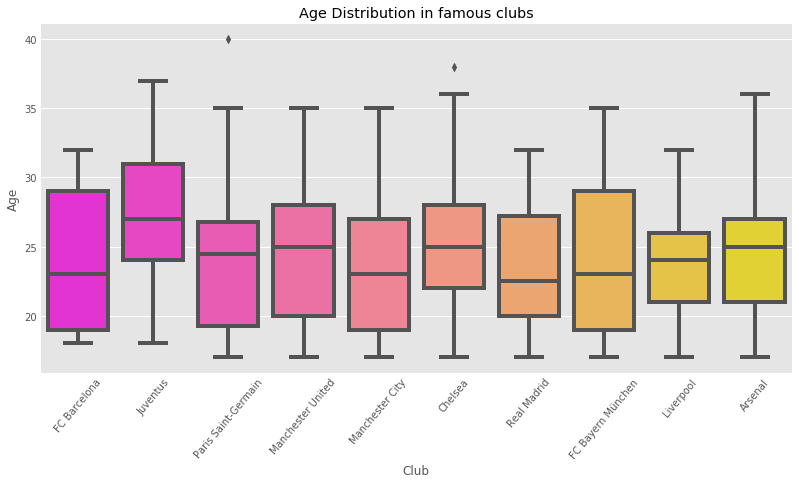

In [52]:
df_club_age = df.loc[df['Club'].isin(clubs) & df['Age']]
plt.figure(1 , figsize = (12,6))
sns.boxplot(x = 'Club', y = 'Age' , data = df_club_age, palette='spring')
plt.title('Age Distribution in famous clubs')
plt.xticks(rotation = 50)
plt.show()

So, Juventus has the eldest set of players and Real Madrid and Liverpool has youngest set of players.

## **Overall Rating in famous clubs**

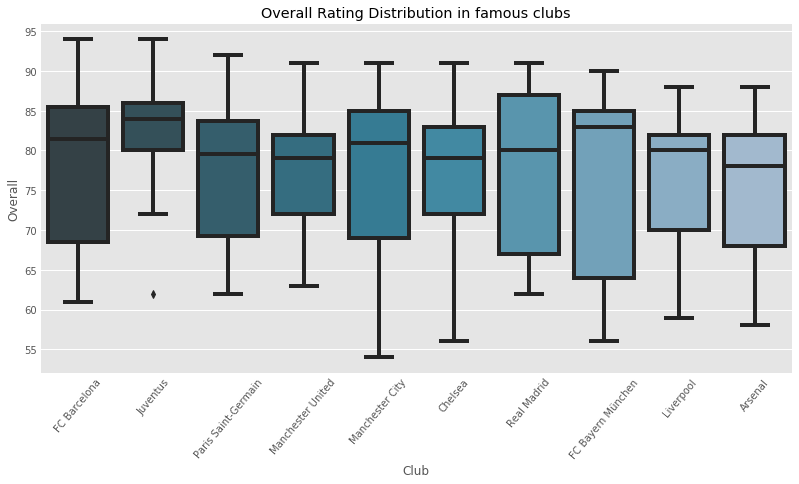

In [53]:
df_club_rating = df.loc[df['Club'].isin(clubs) & df['Overall']]
plt.figure(1 , figsize = (12,6))
sns.boxplot(x = 'Club' , y = 'Overall' , data = df_club_rating, palette='PuBuGn_d')
plt.title('Overall Rating Distribution in famous clubs')
plt.xticks(rotation = 50)
plt.show()

So, Juventus has the best rating of the players.

## **The Best Clubs with Players Overall Rating**

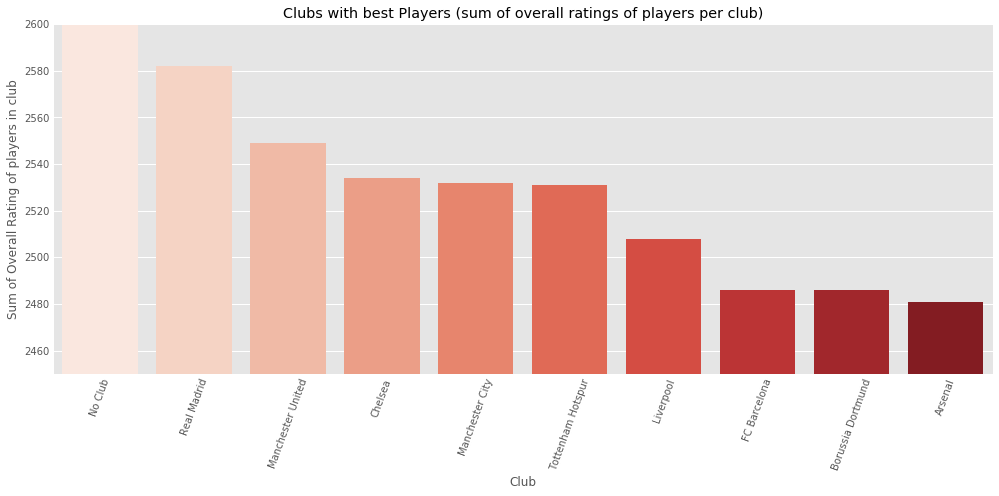

In [54]:
best_dict = {}
for club in df['Club'].unique():
    overall_rating = df['Overall'][df['Club'] == club].sum()
    best_dict[club] = overall_rating
best_club = pd.DataFrame.from_dict(best_dict, orient='index', columns = ['overall'])
best_club['club'] = best_club.index
best_club = best_club.sort_values(by = 'overall', ascending =  False)

plt.figure(1 , figsize = (15 , 6))
sns.barplot(x ='club',y ='overall',data = best_club.head(10),palette='Reds')  
plt.xticks(rotation = 70)
plt.xlabel("Club")
plt.ylabel('Sum of Overall Rating of players in club')
plt.title('Clubs with best Players (sum of overall ratings of players per club)')
plt.ylim(2450 , 2600)
plt.show()

# **9. Profiling top players** 

## **The Best Players**


Q. Who are the 10 best players?

A. The 10 best players are-

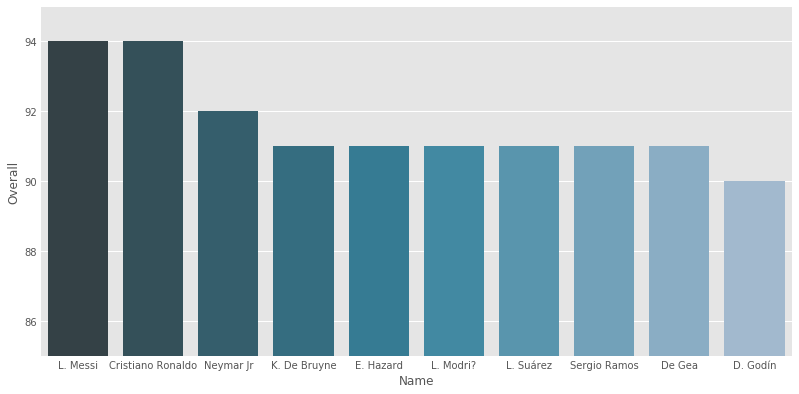

In [55]:
df_best_players = pd.DataFrame.copy(df.sort_values(by ='Overall',ascending = False ).head(10))
plt.figure(1,figsize = (12,6))
sns.barplot(x ='Name' , y = 'Overall' , data = df_best_players, palette='PuBuGn_d')
plt.ylim(85,95)
plt.show()

# **10. Data Analysis** 

- In this section, we will answer few common questions.

### **The Eldest Players**


Q. Who are the top 10 eldest players?

A. The top 10 eldest players are given by -



In [64]:
df.sort_values(by = 'Age' , ascending = False)[['Name','Club','Nationality','Overall', 'Age' ]].head()

,Name,Club,Nationality,Overall,Age
4741,O. Pérez,Pachuca,Mexico,71.0,45.0
18183,K. Pilkington,Cambridge United,England,48.0,44.0
17726,T. Warner,Accrington Stanley,Trinidad & Tobago,53.0,44.0
10545,S. Narazaki,Nagoya Grampus,Japan,65.0,42.0
15426,M. Tyler,Peterborough United,England,59.0,41.0


### **The Youngest Players**


Q. Who are the top 10 youngest players?

A. The top 10 youngest players are given by -



In [65]:
df.sort_values(by = 'Age' , ascending = True)[['Name','Club','Nationality','Overall', 'Age' ]].head()

,Name,Club,Nationality,Overall,Age
11,T. Kroos,Real Madrid,Germany,90.0,0.0
18206,G. Nugent,Tranmere Rovers,England,46.0,16.0
15793,J. Lahne,IF Brommapojkarna,Sweden,59.0,16.0
15746,Y. Begraoui,AJ Auxerre,France,59.0,16.0
18166,N. Ayéva,Örebro SK,Sweden,48.0,16.0


### **The Best Freekick Takers**

Q. Who are the best free-kick takers?

A. The best free-kick takers are given by-


In [66]:
df.sort_values(by = 'FKAccuracy' , ascending = False)[['Name','Club','Nationality','Age','FKAccuracy']].head()

,Name,Club,Nationality,Age,FKAccuracy
0,L. Messi,FC Barcelona,Argentina,31.0,94.0
293,S. Giovinco,Toronto FC,Italy,31.0,93.0
72,M. Pjani?,Juventus,Bosnia Herzegovina,28.0,92.0
1113,E. Bardhi,Levante UD,FYR Macedonia,22.0,91.0
90,Parejo,Valencia CF,Spain,29.0,90.0


### **The Best Penalty Kick Taker**

Q. Who are the best penalty kick takers?

A. The best penalty kick takers are given by -

In [67]:
df.sort_values(by = 'Penalties' , ascending = False)[['Name','Club','Nationality','Age','Penalties']].head()

,Name,Club,Nationality,Age,Penalties
206,M. Balotelli,OGC Nice,Italy,27.0,92.0
118,Fabinho,Liverpool,Brazil,24.0,91.0
16,H. Kane,Tottenham Hotspur,England,24.0,90.0
823,R. Jiménez,Wolverhampton Wanderers,Mexico,27.0,90.0
945,L. Baines,Everton,England,33.0,90.0


### **Best players with the Ball Control**


Q, Who are the best players with the ball control?

A. The best players with the ball control are given by-

In [68]:
df.sort_values(by = 'BallControl' , ascending = False)[['Name','Club','Nationality','Overall', 'Age','BallControl']].head()

,Name,Club,Nationality,Overall,Age,BallControl
0,L. Messi,FC Barcelona,Argentina,94.0,31.0,96.0
2,Neymar Jr,Paris Saint-Germain,Brazil,92.0,26.0,95.0
30,Isco,Real Madrid,Spain,88.0,26.0,95.0
13,David Silva,Manchester City,Spain,90.0,32.0,94.0
5,E. Hazard,Chelsea,Belgium,91.0,27.0,94.0


### **Fastest Players**

Q. Who are the fastest players on the planet?

A. The fastest players on the planet are -

In [69]:
df.sort_values(by = 'SprintSpeed' , ascending = False)[['Name','Club','Nationality','Overall', 'Age','SprintSpeed']].head()

,Name,Club,Nationality,Overall,Age,SprintSpeed
55,L. Sané,Manchester City,Germany,86.0,22.0,96.0
25,K. Mbappé,Paris Saint-Germain,France,88.0,19.0,96.0
1968,Adama,Wolverhampton Wanderers,Spain,75.0,22.0,96.0
36,G. Bale,Real Madrid,Wales,88.0,28.0,95.0
10928,Maicon,Livorno,Brazil,65.0,25.0,95.0


### **The Best Dribbler**


Q. Who is the best dribbler?

A. The best dribbler is-

In [70]:
df.sort_values(by = 'Dribbling' , ascending = False)[['Name','Club','Nationality','Overall', 'Age','Dribbling']].head()

,Name,Club,Nationality,Overall,Age,Dribbling
0,L. Messi,FC Barcelona,Argentina,94.0,31.0,97.0
2,Neymar Jr,Paris Saint-Germain,Brazil,92.0,26.0,96.0
5,E. Hazard,Chelsea,Belgium,91.0,27.0,95.0
30,Isco,Real Madrid,Spain,88.0,26.0,94.0
94,Y. Brahimi,FC Porto,Algeria,85.0,28.0,93.0


### **The Best Finisher**


Q. Who is the best finisher?

A. The best finisher is-

In [71]:
df.sort_values(by = 'Finishing' , ascending = False)[['Name','Club','Nationality','Overall', 'Age','Finishing']].head()

,Name,Club,Nationality,Overall,Age,Finishing
0,L. Messi,FC Barcelona,Argentina,94.0,31.0,95.0
16,H. Kane,Tottenham Hotspur,England,89.0,24.0,94.0
1,Cristiano Ronaldo,Juventus,Portugal,94.0,33.0,94.0
7,L. Suárez,FC Barcelona,Uruguay,91.0,31.0,93.0
23,S. Agüero,Manchester City,Argentina,89.0,30.0,93.0
